<a href="https://colab.research.google.com/github/rosehunnie/NLP/blob/main/MonteCarloSimulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf  # Yahoo Finance API for stock data

In [ ]:
# Download 1 year of daily data for Tesla
tsla_data = yf.download('TSLA', start='2024-04-01', end='2025-04-01')

# Show the first 5 rows
tsla_data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-04-01,175.220001,176.750000,170.210007,176.169998,81562100
2024-04-02,166.630005,167.690002,163.429993,164.750000,116650600
2024-04-03,168.380005,168.820007,163.279999,164.020004,82950100
2024-04-04,171.110001,177.190002,168.009995,170.070007,123162000
2024-04-05,164.899994,170.860001,160.509995,169.080002,141250700


In [ ]:
tsla_close = tsla_data['Close']
tsla_close.head()


Ticker,TSLA
Date,
2024-04-01,175.220001
2024-04-02,166.630005
2024-04-03,168.380005
2024-04-04,171.110001
2024-04-05,164.899994


In [ ]:
# Calculate daily percentage returns
tsla_data['Daily Return'] = tsla_data['Close'].pct_change()

# View the first few daily returns
tsla_data[['Close', 'Daily Return']].head()


Price,Close,Daily Return
Ticker,TSLA,
Date,,
2024-04-01,175.220001,NaN
2024-04-02,166.630005,-0.049024
2024-04-03,168.380005,0.010502
2024-04-04,171.110001,0.016213
2024-04-05,164.899994,-0.036292


In [ ]:
# Drop the first row (NaN return)
daily_returns = tsla_data['Daily Return'].dropna()

# Mean daily return
mean_return = daily_returns.mean()

# Daily volatility (standard deviation of returns)
volatility = daily_returns.std()

print(f"Mean Daily Return: {mean_return:.4f}")
print(f"Daily Volatility: {volatility:.4f}")


Mean Daily Return: 0.0025
Daily Volatility: 0.0435


In [ ]:

# Use the last closing price as the starting point
start_price = tsla_data['Close'].iloc[-1]

# Calculate mean return and volatility from previous step
mean_return = tsla_data['Daily Return'].mean()
volatility = tsla_data['Daily Return'].std()

# Set simulation parameters
num_simulations = 1000
num_days = 252

# Create an empty array to hold simulation results
simulations = np.zeros((num_days, num_simulations))

# Run simulations
for i in range(num_simulations):
    price = start_price
    for d in range(num_days):
        daily_return = np.random.normal(loc=mean_return, scale=volatility)
        price = price * (1 + daily_return)
        simulations[d, i] = price


<ipython-input-9-3564ec6435d3>:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  simulations[d, i] = price


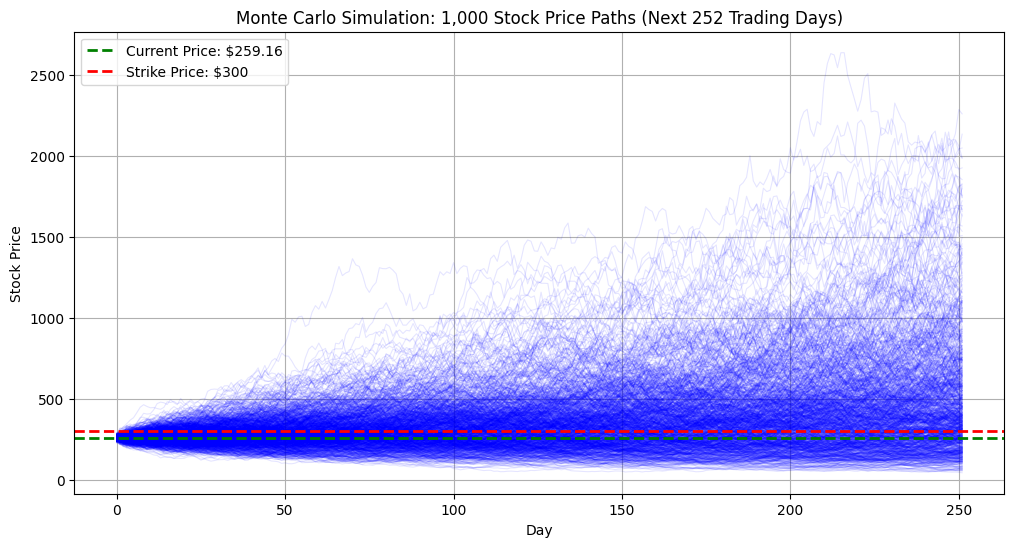

In [ ]:
# Choose a strike price (for options analysis)
strike_price = 300  #

# Plot all simulations
plt.figure(figsize=(12, 6))
plt.plot(simulations, alpha=0.1, color='blue', linewidth=0.8)

# Overlay current stock price (horizontal line)
# Extract the raw numerical value from the start_price Series
start_price_value = start_price.iloc[0] if isinstance(start_price, pd.Series) else start_price
plt.axhline(y=start_price_value, color='green', linestyle='--', linewidth=2, label=f"Current Price: ${start_price_value:.2f}")

# Overlay strike price (horizontal line)
plt.axhline(y=strike_price, color='red', linestyle='--', linewidth=2, label=f"Strike Price: ${strike_price}")

# Labels and legend
plt.title("Monte Carlo Simulation: 1,000 Stock Price Paths (Next 252 Trading Days)")
plt.xlabel("Day")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Get final prices from the last day of each simulation
final_prices = simulations[-1, :]

# Mean estimated stock price after 1 year
mean_price = np.mean(final_prices)

# 95% confidence interval
conf_interval = np.percentile(final_prices, [2.5, 97.5])

print(f" Mean Forecasted Price After 1 Year: ${mean_price:.2f}")
print(f" 95% Confidence Interval: ${conf_interval[0]:.2f} to ${conf_interval[1]:.2f}")


 Mean Forecasted Price After 1 Year: $505.65
 95% Confidence Interval: $101.52 to $1490.26



Interpret your results: The simulation shows a mean forcasted stock price of approximately %505.65 after one year. This shows that based on historical data, the average expected future price is near this value providing that the return pattern continues.

What does the mean predicted stock price tell us? We can calculate a 95% confidence interval range.

What is the risk of a price drop based on the simulation?
There is a 5% chance the price could fall below what is predicted.

How can traders or investors use this information for decision-making?
They can use Monte Carolo results to:
- Understand range of possible outcomes and not just 1
- it can set realistic targets and plan entry/exit points
- assess the risk or likelyhood of something happening that wasn't foreseeing.

Explain at least one limitation of Monte Carlo simulations in stock price forecasting.
A limitation that theMonte Carlo Simulation has is that it assumse the future behaves like the past, but as we have seen from the past week, it could not predict what had happened based on past performance.